In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 2000)
import RENT

import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn.datasets import load_breast_cancer

wisconsin = load_breast_cancer()
data = pd.DataFrame(wisconsin.data)
data.columns = wisconsin.feature_names
target = wisconsin.target

In [7]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, target, random_state=0, shuffle=True)

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

data = make_classification(n_samples=250, n_features=1000, n_informative=20, n_redundant=100, random_state=0, shuffle=False)

my_data = pd.DataFrame(data[0])
my_target = data[1]
my_feat_names = ['f{0}'.format(x+1) for x in range(len(my_data.columns))]

data, test_data, labels, test_labels = train_test_split(my_data, my_target, test_size=0.3, random_state=0)

In [ ]:
my_C_params = [0.1, 1, 10]

# Define a reange of l1-ratios for elastic net.  A minimum of at least one value is required.
my_l1_ratios = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

# Define setting for RENT
analysis = RENT.RENT_Classification(data=data, 
                                    target=labels, 
                                    feat_names=data.columns, 
                                    C=my_C_params, 
                                    l1_ratios=my_l1_ratios,
                                    parameter_selection=False,
                                    poly='OFF',
                                    testsize_range=(0.25,0.25),
                                    scoring='mcc',
                                    method='logreg',
                                    K=100,
                                    verbose=0)

data dimension: (175, 1000)  data type: <class 'pandas.core.frame.DataFrame'>
target dimension (175,)
regularization parameters C: [0.1, 1, 10]
elastic net l1_ratios: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]
number of models in ensemble: 100
scale: True
classification method: logreg
verbose: 0


In [10]:
import numpy as np
mat = np.array([[1,2,0],[0,0,1]])

In [14]:
mat
(pd.DataFrame(mat) == 0)*1

,0,1,2
0,0,0,1
1,1,1,0


In [5]:
analysis.train()

In [6]:
selected_features = analysis.selectFeatures(tau_1_cutoff=0.9, tau_2_cutoff=0.9, tau_3_cutoff=0.975)

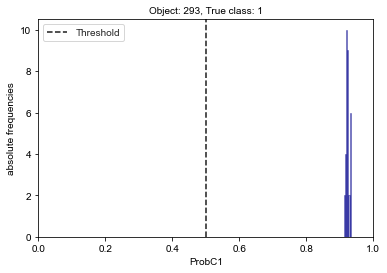

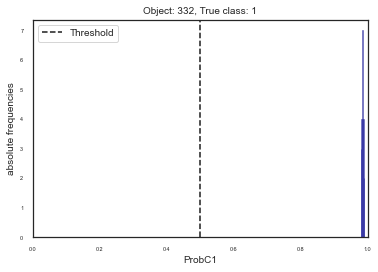

In [9]:
analysis.plot_object_probabilities(object_id=[293, 332])

loo


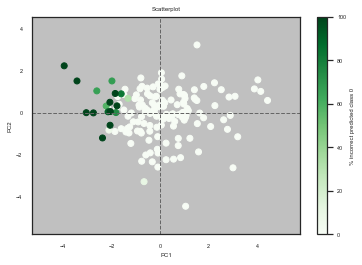

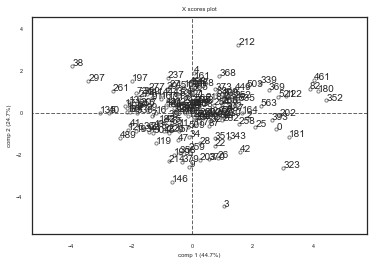

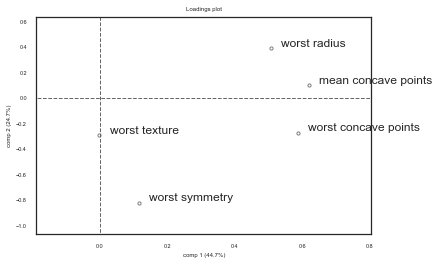

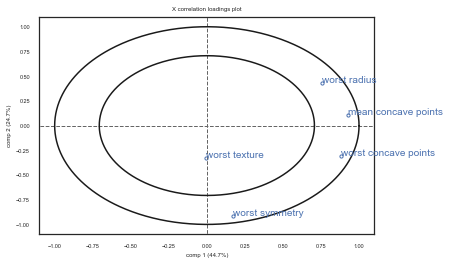

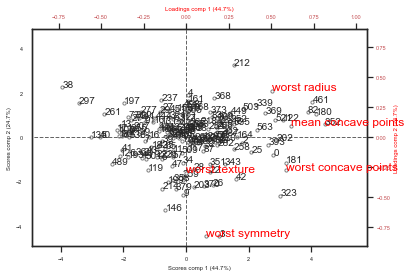

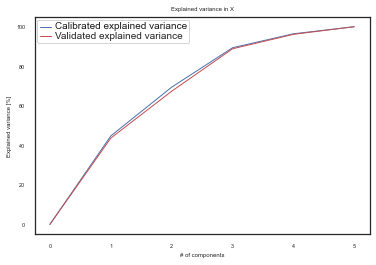

In [10]:
analysis.summary_objects()
analysis.plot_object_PCA(cl=0)

0.9409198630485198
[0.8405267241362306, 0.730188679245283, 0.8568295329945143, 0.8646669860157726, 0.9409198630485198, 0.8798274352952579, 0.8358455055528305, 0.8378398713451533, 0.881396952004088, 0.9553116797597819, 0.8657120491045684, 0.910062893081761, 0.9117937949604076, 0.8036333872232957, 0.8675034270773535, 0.8971669828095538, 0.6967789533642852, 0.8947661532504989, 0.730188679245283, 0.8675034270773535, 0.8358455055528305, 0.6052547123987989, 0.881396952004088, 0.8059789620010928, 0.911158407526304, 0.851635496481872, 0.819321090932508, 0.5071863746436343, 0.899503820088871, 0.8568295329945143, 0.8675034270773535, 0.881396952004088, 0.8971669828095538, 0.8947661532504989, 0.8834569691884416, 0.8311798387678, 0.881396952004088, 0.7888663730814292, 0.5400668522236551, 0.8657120491045684, 0.8353870484396912, 0.730188679245283, 0.790146750524109, 0.9409198630485198, 0.880083857442348, 0.851635496481872, 0.8110381761599106, 0.7623511299152241, 0.8493193549734291, 0.8700152721125508

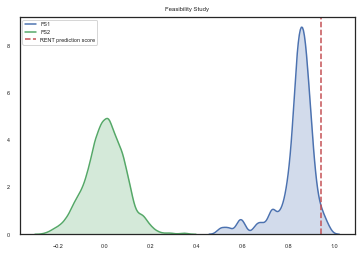

In [12]:
analysis.feasibility_study(test_data_sc, test_labels, num_drawings=100, num_permutations=1000)

In [13]:
test_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
512,13.400,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.081720,0.2116,0.07325,0.3906,0.9306,3.0930,33.670,0.005414,0.022650,0.034520,0.013340,0.01705,0.004005,16.410,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.210,25.25,84.10,537.9,0.08791,0.05205,0.027720,0.020680,0.1619,0.05584,0.2084,1.3500,1.3140,17.580,0.005768,0.008082,0.015100,0.006451,0.01347,0.001828,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.020,15.66,89.59,606.5,0.07966,0.05581,0.020870,0.026520,0.1589,0.05586,0.2142,0.6549,1.6060,19.250,0.004837,0.009238,0.009213,0.010760,0.01171,0.002104,14.910,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.260,18.17,91.22,633.1,0.06576,0.05220,0.024750,0.013740,0.1635,0.05586,0.2300,0.6690,1.6610,20.560,0.003169,0.013770,0.010790,0.005243,0.01103,0.001957,16.220,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863,0.1839,2.3420,1.1700,14.160,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
515,11.340,18.61,72.76,391.2,0.10490,0.08499,0.043020,0.025940,0.1927,0.06211,0.2430,1.0100,1.4910,18.190,0.008577,0.016410,0.020990,0.011070,0.02434,0.001217,12.470,23.03,79.15,478.6,0.14830,0.15740,0.16240,0.08542,0.3060,0.06783
382,12.050,22.72,78.75,447.8,0.06935,0.10730,0.079430,0.029780,0.1203,0.06659,0.1194,1.4340,1.7780,9.549,0.005042,0.045600,0.043050,0.016670,0.02470,0.007358,12.570,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349
310,11.700,19.11,74.33,418.7,0.08814,0.05253,0.015830,0.011480,0.1936,0.06128,0.1601,1.4300,1.1090,11.280,0.006064,0.009110,0.010420,0.007638,0.02349,0.001661,12.610,26.55,80.92,483.1,0.12230,0.10870,0.07915,0.05741,0.3487,0.06958
538,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,0.1870,0.07285,0.3777,1.4620,2.4920,19.140,0.012660,0.009692,0.000000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.00000,0.00000,0.3058,0.09938
345,10.260,14.71,66.20,321.6,0.09882,0.09159,0.035810,0.020370,0.1633,0.07005,0.3380,2.5090,2.3940,19.330,0.017360,0.046710,0.026110,0.012960,0.03675,0.006758,10.880,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488


In [14]:
train_data_sc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,-0.650799,-0.430573,-0.680248,-0.626983,-0.913819,-0.933352,-0.787631,-0.679444,0.254041,-0.798772,-0.689589,0.047238,-0.780363,-0.553374,0.215464,-0.594503,-0.559643,-0.528893,-0.307186,-0.734142,-0.666144,0.018492,-0.681179,-0.631501,0.191962,-0.507751,-0.695929,-0.364339,0.323499,-0.757849
332,-0.828353,0.152265,-0.827738,-0.753094,0.652812,-0.708753,-1.066546,-1.071909,0.489037,-0.341454,-0.373723,1.381566,-0.428297,-0.434922,2.090910,-0.828105,-0.904196,-1.140327,2.684419,-0.666009,-0.887045,0.023445,-0.900486,-0.771001,0.432101,-1.029169,-1.292774,-1.450367,0.625631,-1.030714
565,1.682772,2.189772,1.600098,1.673839,0.103624,-0.005326,0.705766,1.257731,-0.190645,-1.064688,1.257556,2.292502,1.147018,1.204005,-0.431290,-0.050023,0.248337,0.859912,-0.177807,-0.462371,1.508098,2.082033,1.401345,1.439992,-0.694368,-0.399657,0.262556,0.725046,-0.513298,-0.966014
278,-0.160411,-0.338290,-0.241878,-0.239207,-1.220208,-1.247434,-0.875740,-0.948189,-0.837790,-1.083682,-0.511784,-0.084728,-0.562325,-0.381268,-1.149591,-1.168242,-0.670111,-1.127289,-0.854000,-0.984597,-0.167070,0.076272,-0.252000,-0.253640,-1.200842,-1.164088,-0.825141,-0.967772,-0.888195,-1.176430
489,0.713269,0.234834,0.612740,0.553289,-1.546108,-0.642973,-0.665094,-0.672481,0.149196,-1.368593,-0.549088,-1.180967,-0.517649,-0.366203,-1.529993,-0.626358,-0.556141,-1.084449,-0.100911,-0.766115,0.585631,0.152210,0.584842,0.335264,-1.379854,0.258130,-0.109936,-0.425826,2.816487,-0.411282
346,-0.591614,-0.080870,-0.634363,-0.591983,-0.903702,-0.903326,-1.034618,-1.048568,-0.902866,-0.312232,-0.564080,-0.110389,-0.622540,-0.467940,0.068475,-0.832824,-0.823493,-1.050923,-0.075279,-0.364930,-0.547512,0.234752,-0.616626,-0.555007,-0.157330,-0.775347,-1.132724,-0.981809,-0.026089,-0.152482
357,-0.081498,-0.734135,-0.148468,-0.179763,-0.645728,-0.962982,-0.938858,-0.728964,-1.376474,-0.553310,-0.524684,0.276347,-0.536102,-0.411809,-0.477689,-1.011033,-0.841894,-0.958302,-0.609887,-0.618811,-0.246840,-0.009572,-0.315964,-0.329964,-0.751128,-1.002080,-1.093405,-0.911167,-0.845485,-0.698212
355,-0.450698,-0.039586,-0.418865,-0.479484,-0.633444,0.002576,0.182975,-0.134993,-0.982403,-0.113525,-0.155476,0.487126,0.180171,-0.272515,1.015230,1.018880,0.987234,1.347569,0.726632,0.187366,-0.602737,-0.529584,-0.543524,-0.580961,-0.999999,-0.346929,-0.154857,-0.345267,-1.226710,-0.656016
112,0.028417,0.101267,0.232955,-0.079208,-1.300418,2.363136,2.698747,0.743713,-0.364181,2.202287,-0.146411,0.509121,0.270980,-0.236195,-0.598115,2.913057,3.559206,1.899569,0.637531,3.527404,-0.207978,-0.314976,-0.013534,-0.305035,-1.878033,1.097171,2.063437,0.537379,-0.788539,1.387379
68,-1.445848,-0.462144,-1.366483,-1.133092,0.739526,0.743337,2.860685,-0.139119,1.107259,2.607006,-0.269829,-0.033408,-0.464232,-0.475162,0.907555,3.597344,8.662402,3.643619,2.628273,2.225265,-1.228624,-0.493266,-1.236814,-0.961212,0.685338,1.210537,4.959081,0.911187,2.106238,1.910605
